# Spatial Choice Models

With spatial choice models (or [Location models](https://en.wikipedia.org/wiki/Location_model)) we still consider choices with multiple criteria, but now we have an "ideal point" (there is an underlying landscape of utility) from which available choices are located at some distance.

An early example of a spatial choice model was Hotelling's 1929 ["Linear city model"](https://en.wikipedia.org/wiki/Location_model#Hotelling's_Location_Model), modeling the competition of two firms located at different points of a line (e.g., two shops in the same street). However, spatial choice models do not need to be representing physical space, they can also represent other criteria spatially (see examples below)

**Example**: spatial choice of Indian restaurants

Restaurants represented along the dimension of spiciness (from "cold" to "hot"), with the restaurant being chosen by its distance from ideal spiciness point.

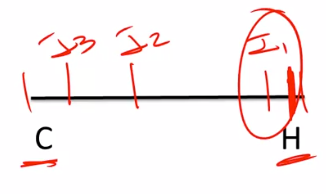

**Example**: voters' choice on the political continuum

[Anthony Downs](https://en.wikipedia.org/wiki/Anthony_Downs) repurposed Hotelling's model in 1957 to represent the continuum between the political left and right (in terms of economic policy).

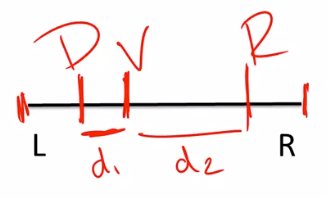

**Example**: estimating conservativity of SCOTUS and POTUS over time

Example of representing conservativty (1-dim model) of US Supreme Court justices and US presidents over time (the lecture seems to misattribute the work to [Andrew Gelman](https://en.wikipedia.org/wiki/Andrew_Gelman) instead of Martin & Quinn; see the [Martin-Quinn score](https://en.wikipedia.org/wiki/Martin-Quinn_score) as an example of a Bayesian ideal point model): 

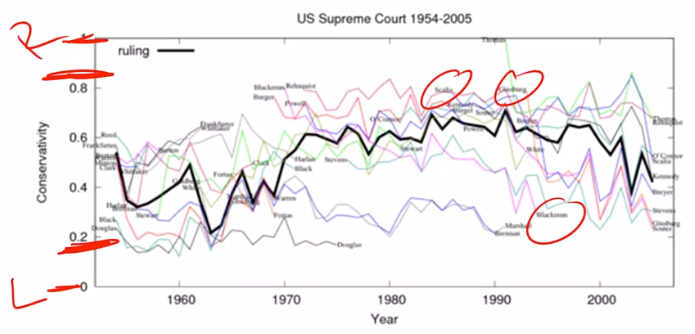

**Example**: Two-dimensional spatial model of car choice

E.g., deciding between cars by seeing which is closer to one's ideal point in terms of speed and comfort.

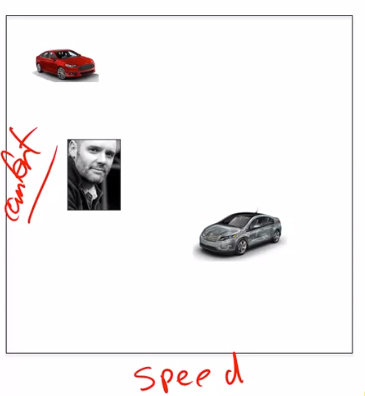

**Example**: Multi-dimensional spatial model of hamburger choice

Judging hamburgers along 6 dimensions, and comparing them with an ideal point.

| 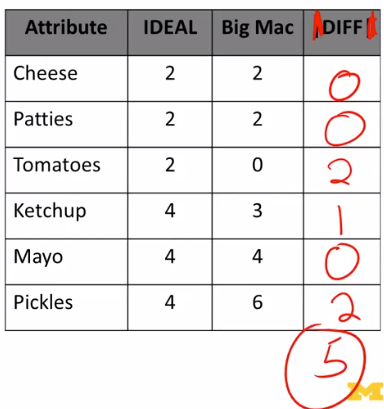 | 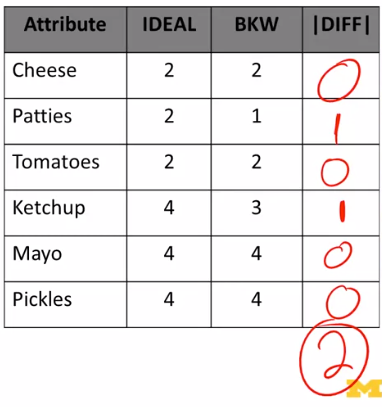 |
|:---:|:---:|

We cannot represent the 6-dimensional space directly, but we can approximate using a 2-dimensional representation that tries to preserve distances in the original higher-dimensional space (see [Multidimensional scaling](https://en.wikipedia.org/wiki/Multidimensional_scaling)).

**Example**: Inferring other people's ideal point from choice

Using the spatial choice model positively, we can infer the approximate location of the ideal point from people's choices alone.

| 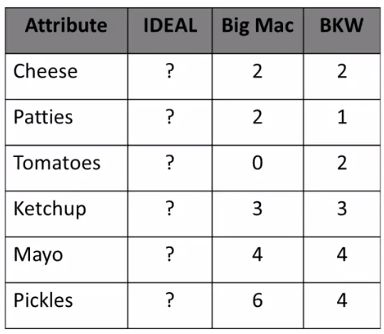 | 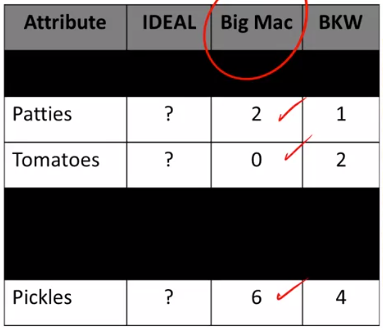 |
|:---:|:---:|

From an observed choice, we know that the ideal point must be closer to it than to any other choice (see [Voronoi diagrams](https://en.wikipedia.org/wiki/Voronoi_diagram) and [Nearest neighbor search](https://en.wikipedia.org/wiki/Nearest_neighbor_search)).

**Example** (from in-lecture quiz):

"My friend Jim uses this spatial preference idea to pick out an ice cream cone.  Jim cares about two attributes: the height of the cone and the number of scoops it holds.  Jim chooses a 4" cone with 3 scoops (4,3), turning down two others: a 7" cone with 2 scoops (7,2), and a 2" cone with 4 scoops (2,4).  Thinking in terms of spatial preferences, which of the following point(s) could be Jim's ideal point?  (Assume that he computes the distance from each option to his ideal point)."

Options:
* (5,3)
* (8,1)
* (4,2)
* (3,11)

Let's try to solve this using a Voronoi diagram.


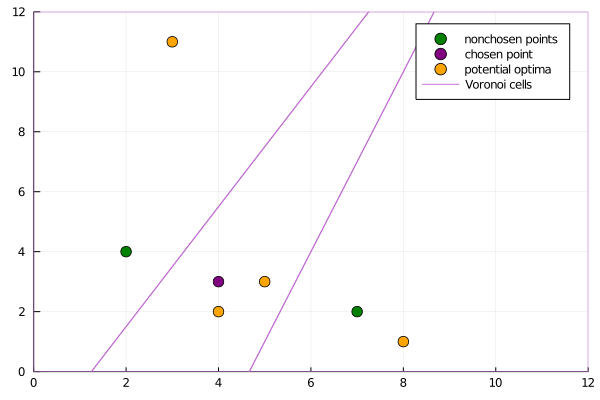

In [1]:
# Setup
using VoronoiCells
using GeometryBasics
using Plots

# Set up the seed/generator points (here, possible choices), the encompassing rectangle, and potential optima

rect = Rectangle(Point2(0.0, 0.0), Point2(12.0, 12.0))
chosen_point = Point2(4.0, 3.0)
nonchosen_points = [
    Point2(7.0, 2.0),
    Point2(2.0, 4.0)
]
seed_points = [chosen_point, nonchosen_points...]

potential_optima = [
    Point2(5.0, 3.0),
    Point2(8.0, 1.0),
    Point2(4.0, 2.0),
    Point2(3.0, 11.0)
]

# Calculate the Voronoi tesselation
tess = voronoicells(seed_points, rect);

# Plot the tesselation and points of interest
scatter(nonchosen_points, markersize = 6, label = "nonchosen points", color = :green)
scatter!(chosen_point, markersize = 6, label = "chosen point", color = :purple)
scatter!(potential_optima, markersize = 6, label = "potential optima", color = :orange)
plot!(tess)

From the Voronoi diagram we can see that points (4, 2) and (5, 3) fall into the Voronoi cell of the chosen point, and are thus potential optima.

**Example**: mapping US congress members ideologically

Example from Michael Tofias' blog [post](https://log.tofias.net/post/850323875/eric-ostermeier-has-a-nice-post-about-the-profile):

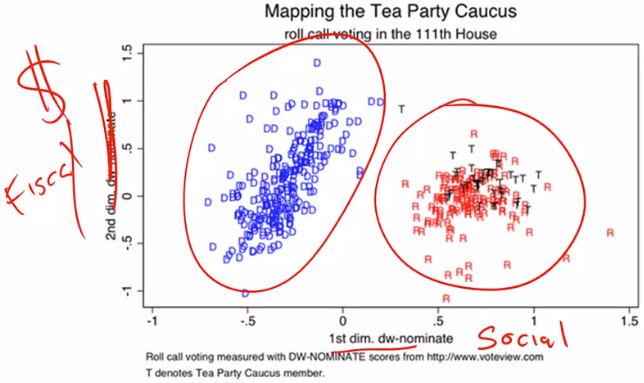

The [DW-NOMINATE method](https://en.wikipedia.org/wiki/NOMINATE_(scaling_method)) is an example of [multidimensional scaling](https://en.wikipedia.org/wiki/Multidimensional_scaling).


**Example** (not from lecture): combining spatial choice models with preference aggregation

Check out [Nicky Case's](https://ncase.me/) interactive [guide](https://ncase.me/ballot) to voting systems. Here's an example of a "spoiler candidate":

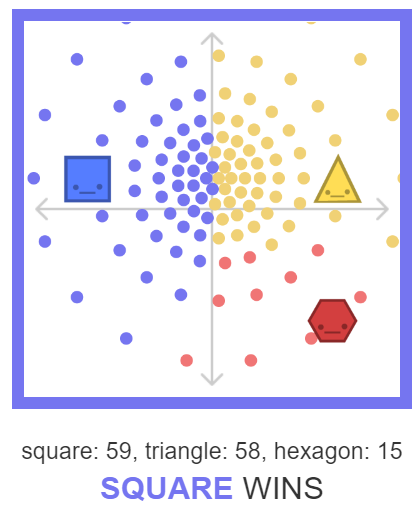

The points here are voters, and the geometric shapes are choices (candidates).